In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Concrete_Data_Yeh.csv")
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [4]:
df_dupli = df.duplicated()
df[df_dupli].shape

(25, 9)

In [5]:
df = df.drop_duplicates()
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


Since we do not need duplication of distinct rows, we choose to drop the duplicates.

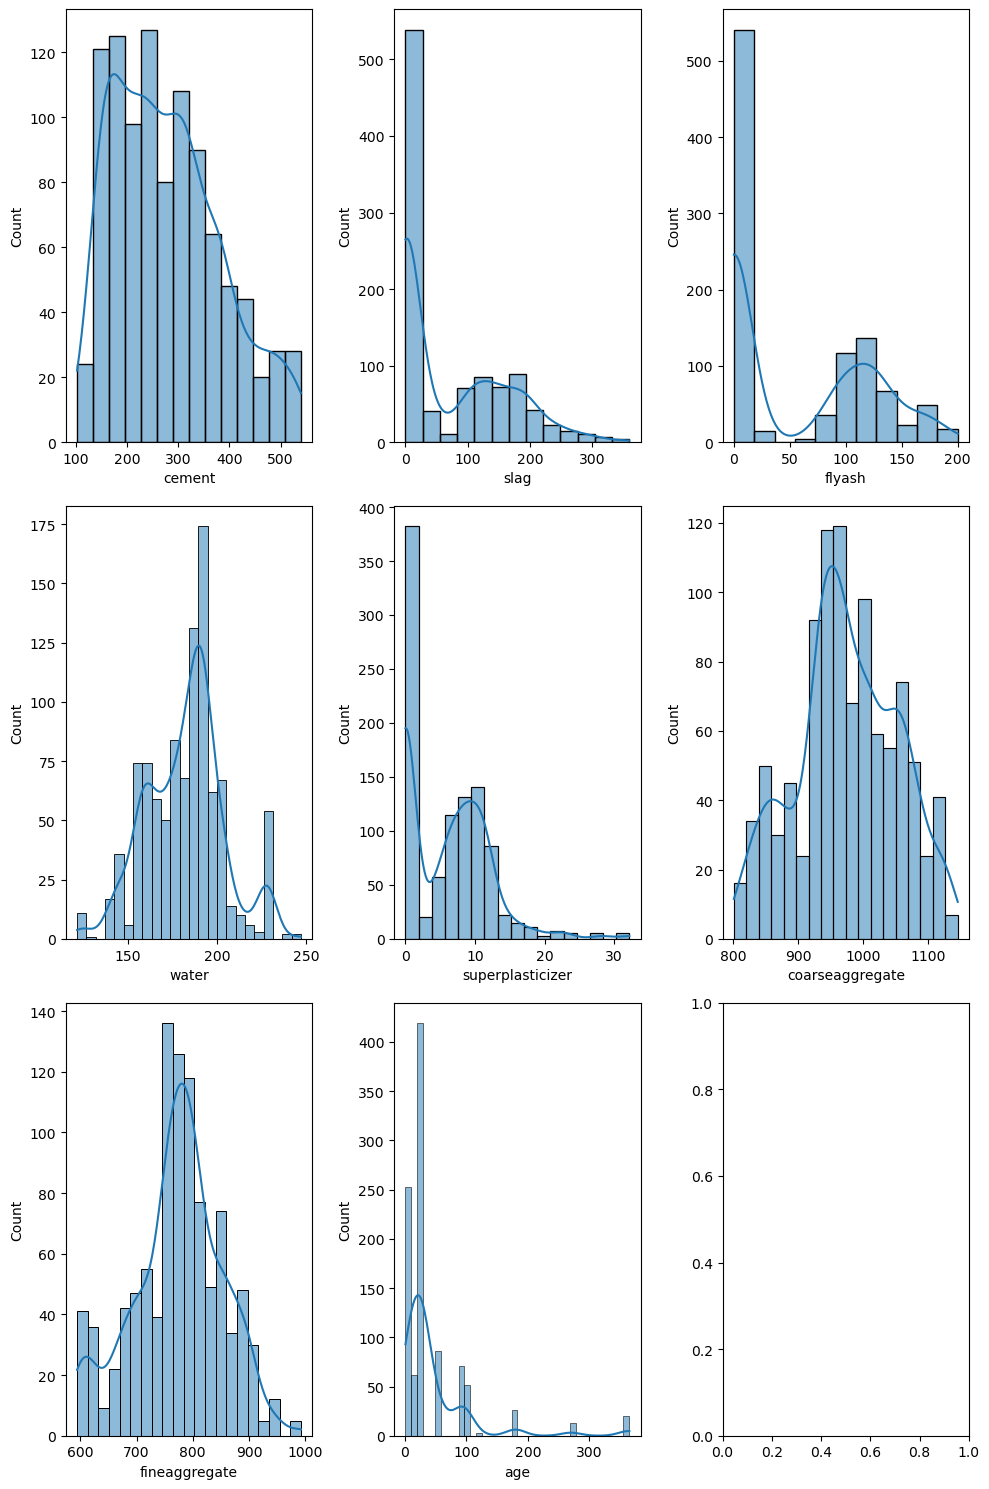

In [6]:
collumn = list(df.columns)
collumn.remove('csMPa')
collumn

fig , axes = plt.subplots(3,3,figsize=(10,15))
axes = axes.flatten()

for h,i in enumerate(collumn):
    sns.histplot(df[i],ax=axes[h],kde=True)
    
plt.tight_layout()

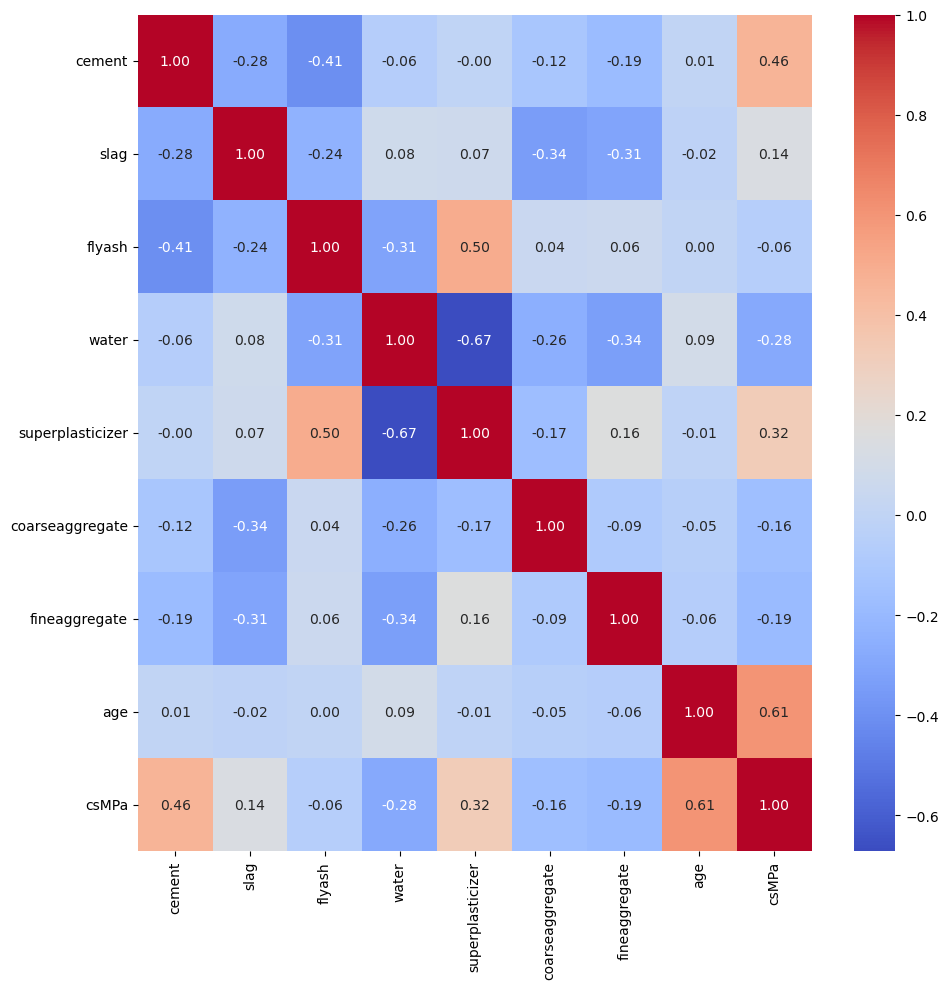

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method="spearman"),annot=True,fmt=".2f",cmap="coolwarm")
plt.tight_layout()

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
flyash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplasticizer,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseaggregate,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineaggregate,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
csMPa,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


In [9]:
collumn = list(df.columns)
collumn.remove('csMPa')
collumn

['cement',
 'slag',
 'flyash',
 'water',
 'superplasticizer',
 'coarseaggregate',
 'fineaggregate',
 'age']

In [10]:
result = []
for i in collumn :
    q1 = np.round(np.percentile(df[i], 25), 2)
    q3 = np.round(np.percentile(df[i], 75), 2)
    iqr = q3 - q1
    lower_bound = np.round(q1 - 1.5 * iqr, 2)
    upper_bound = np.round(q3 + 1.5 * iqr, 2)
    
    outliers = df[
        (df[i] < lower_bound) | (df[i] > upper_bound)
    ].shape[0]
    
    result.append(
        {
            "col": i,
            "Q1": q1,
            "Q3": q3,
            "IQR": iqr,
            "lower_bound": lower_bound,
            "upper_bound": upper_bound,
            "outliers": outliers,
        }
    )

df_outliers = pd.DataFrame(result)
df_outliers

,col,Q1,Q3,IQR,lower_bound,upper_bound,outliers
0,cement,190.7,349.0,158.3,-46.75,586.45,0
1,slag,0.0,142.5,142.5,-213.75,356.25,2
2,flyash,0.0,118.3,118.3,-177.45,295.75,0
3,water,166.6,192.9,26.3,127.15,232.35,15
4,superplasticizer,0.0,10.0,10.0,-15.00,25.00,10
5,coarseaggregate,932.0,1031.0,99.0,783.50,1179.50,0
6,fineaggregate,724.3,822.2,97.9,577.45,969.05,5
7,age,7.0,56.0,49.0,-66.50,129.50,59


In [11]:
col_outliers = list(df_outliers[df_outliers["outliers"]!= 0]["col"])
col_outliers

['slag', 'water', 'superplasticizer', 'fineaggregate', 'age']

In [12]:
upper_bound_outliers = list(df_outliers[df_outliers["outliers"]!= 0]["upper_bound"])
upper_bound_outliers

[356.25, 232.35, 25.0, 969.05, 129.5]

In [13]:
lower_bound_outliers = list(df_outliers[df_outliers["outliers"]!= 0]["lower_bound"])
lower_bound_outliers

[-213.75, 127.15, -15.0, 577.45, -66.5]

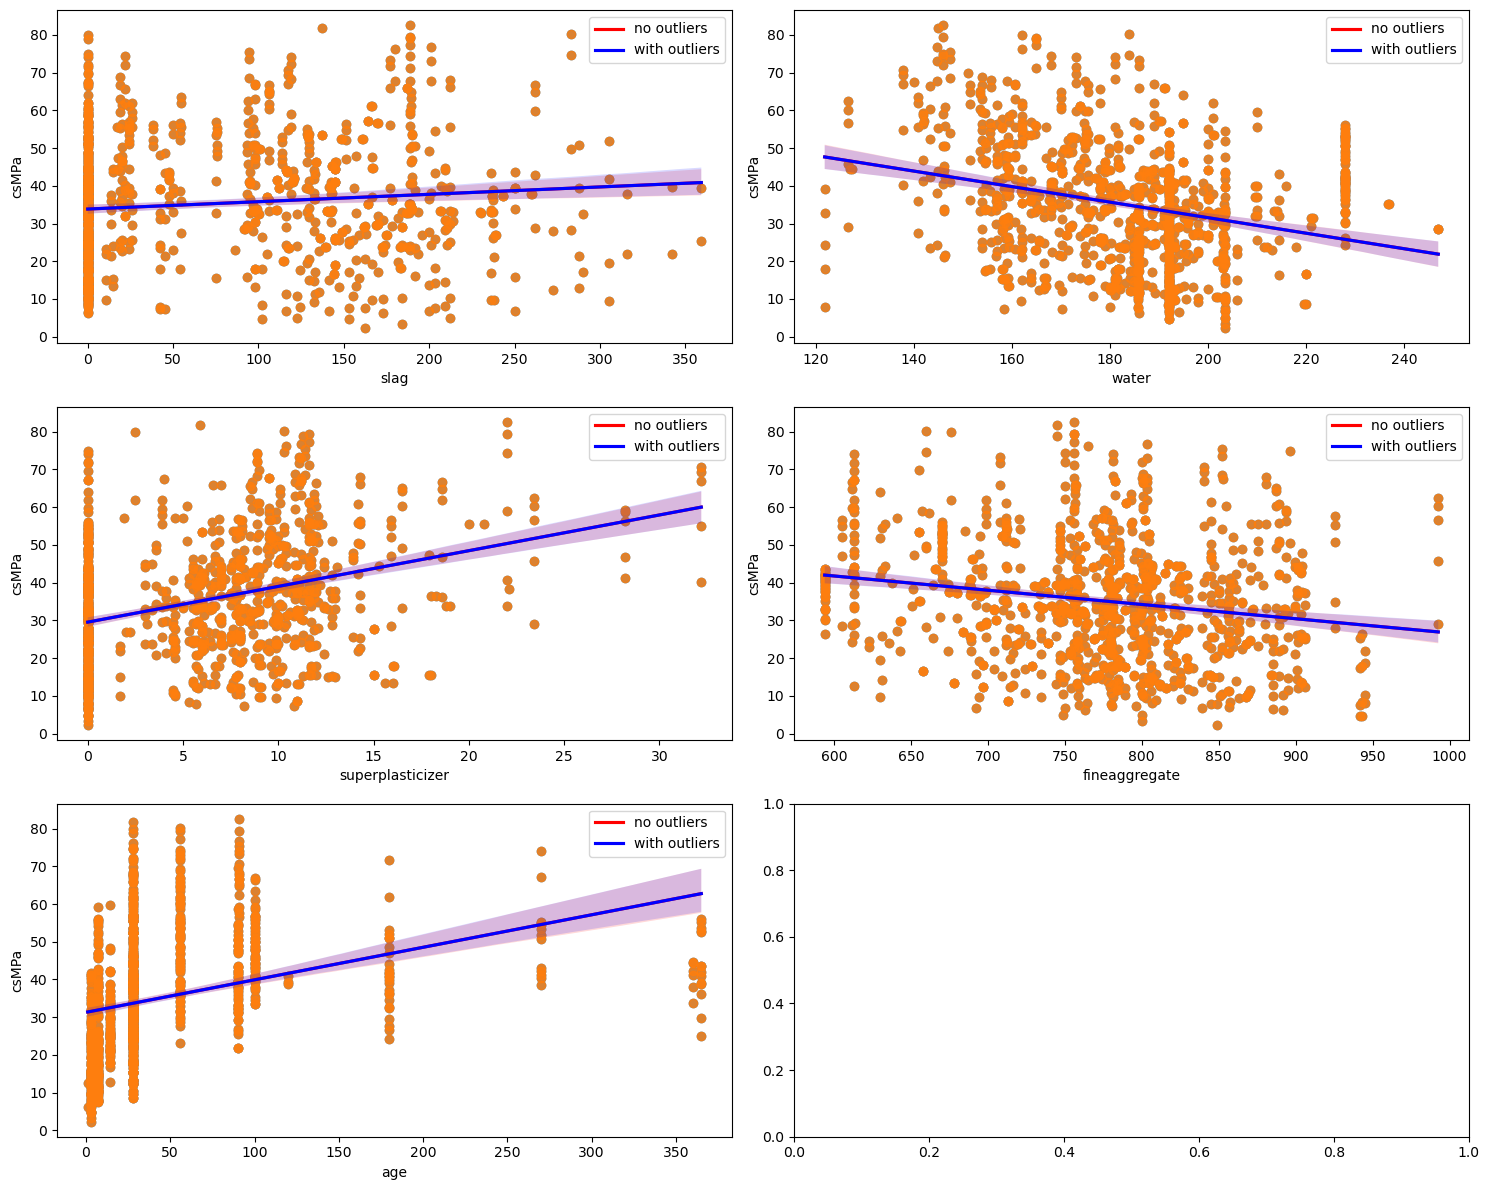

In [14]:
#plotting regression line with outliers and without outliers
fig, axes = plt.subplots(3, 2, figsize=(15, 12)) 
axes = axes.flatten()  

for h, (i, j, k) in enumerate(zip(col_outliers, upper_bound_outliers, lower_bound_outliers)):
    # First regplot with no outliers
    sns.regplot(df,
                x=df[i][(df[i] < j) | (df[i] > k)],
                y=df["csMPa"][(df[i] < j) | (df[i] > k)],
                line_kws={"color": "red", "label": "no outliers"}, ax=axes[h])

    # Second regplot with outliers
    sns.regplot(df,
                x=df[i], 
                y=df["csMPa"],
                line_kws={"color": "blue", "label": "with outliers"}, ax=axes[h])

    axes[h].legend()

plt.tight_layout()
plt.show()

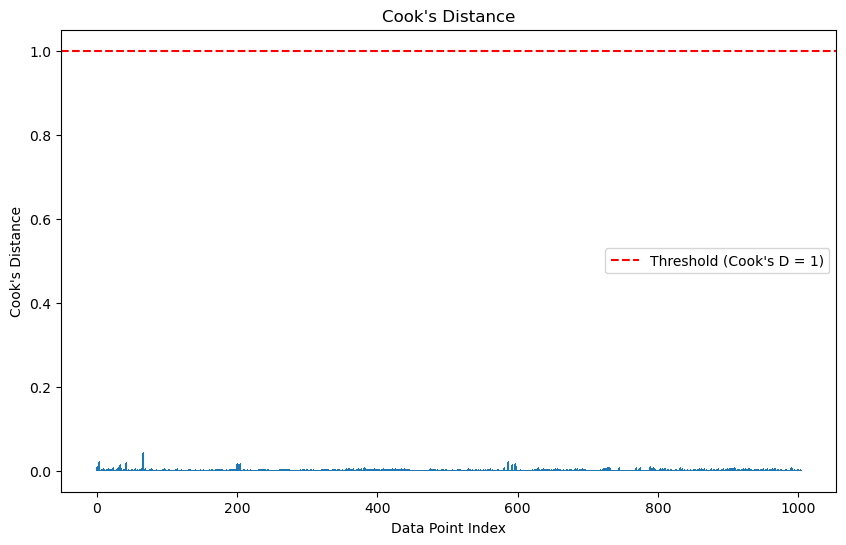

Potential influential outliers: (array([], dtype=int64),)


In [15]:
import statsmodels.api as sm


X_constant = sm.add_constant(df)
model = sm.OLS(df['csMPa'], X_constant).fit()

influence = model.get_influence()

# Cook's distance values
cooks_d = influence.cooks_distance[0]

# Plot Cook's distance 
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", basefmt=" ")
plt.axhline(y=1, color='r', linestyle='--', label="Threshold (Cook's D = 1)")
plt.title("Cook's Distance")
plt.xlabel("Data Point Index")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()

outliers = np.where(cooks_d > 1)
print("Potential influential outliers:", outliers)

By looking at regression line and Cook's distance, we see that the outliers present have no significant influence, therefore the outliers will be kept.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variable"]=X.columns
    vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)

In [17]:
calc_vif(df.drop("csMPa",axis=1))

,variable,VIF
0,cement,15.143662
1,slag,3.260685
2,flyash,4.170393
3,water,81.401338
4,superplasticizer,5.170736
5,coarseaggregate,84.735483
6,fineaggregate,72.490935
7,age,1.696257


In [18]:
calc_vif(df[['cement',
 'slag',
 'flyash',
 'superplasticizer',
 'age']])

,variable,VIF
0,cement,2.718666
1,slag,1.474251
2,flyash,1.972360
3,superplasticizer,2.898519
4,age,1.545505


# model training

OLS model

In [19]:
df_ols = df.copy()

In [20]:
X_ols=sm.add_constant(df_ols[['cement',
 'slag',
 'flyash',
 'superplasticizer',
 'age']])
y_ols=df_ols["csMPa"]

In [21]:
sm_lm = sm.OLS(y_ols,X_ols)
result = sm_lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     256.1
Date:                Fri, 27 Sep 2024   Prob (F-statistic):          3.97e-176
Time:                        17:38:11   Log-Likelihood:                -3815.2
No. Observations:                1005   AIC:                             7642.
Df Residuals:                     999   BIC:                             7672.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -10.5006      1.697  

In [22]:
df_ols["y_pred"] = pd.DataFrame(result.fittedvalues,columns=["prediction"])
df_ols["residual"] = pd.DataFrame(result.resid,columns=["residual"])

In [23]:
from sklearn import metrics

In [62]:
print("MAE :" , metrics.mean_absolute_error(y_ols, df_ols["y_pred"]))

MAE : 8.606379296200627


Text(0.5, 0, 'Residual')

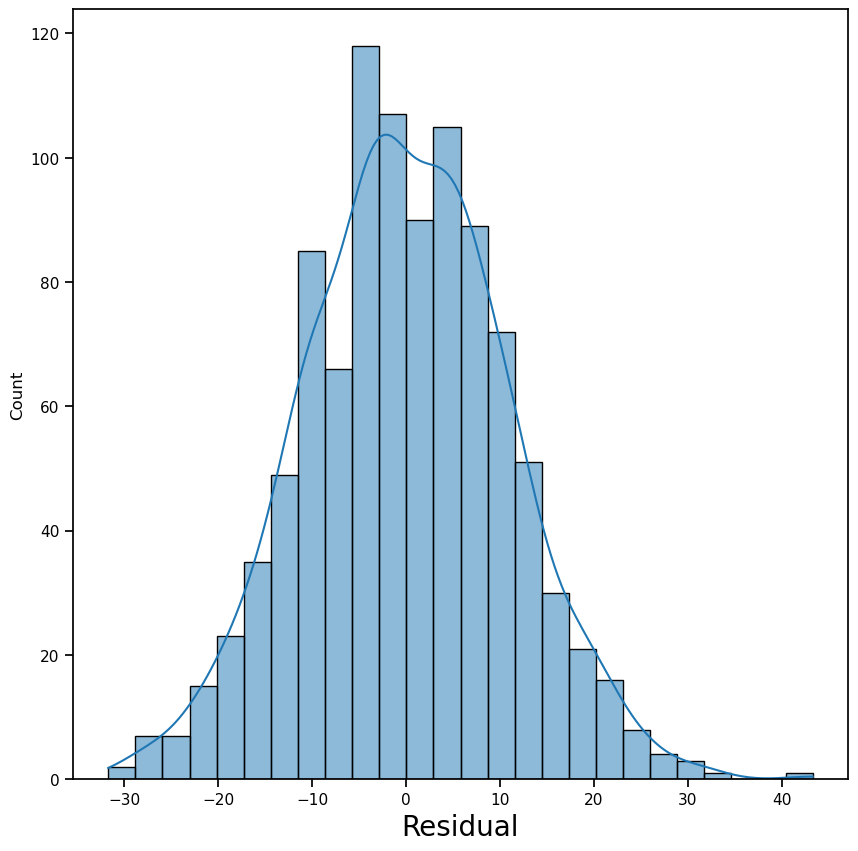

In [25]:
plt.figure(figsize=(10,10))
sns.set_context("notebook",font_scale=1)
sns.histplot(df_ols["residual"],kde=True)
plt.xlabel("Residual",fontsize=20)

The residuals appear to be symmetrically distributed around zero, which suggests that the residuals may follow a normal distribution.

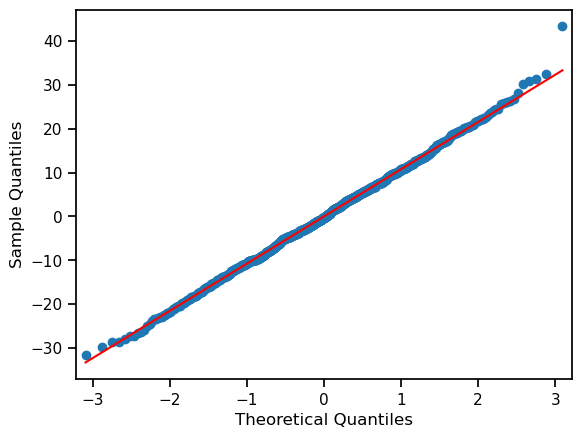

In [26]:
sm.qqplot(df_ols["residual"],line="s")
plt.show()

The points lie along the red line, indicating that the data can be considered approximately normally distributed.

Text(0, 0.5, 'residual')

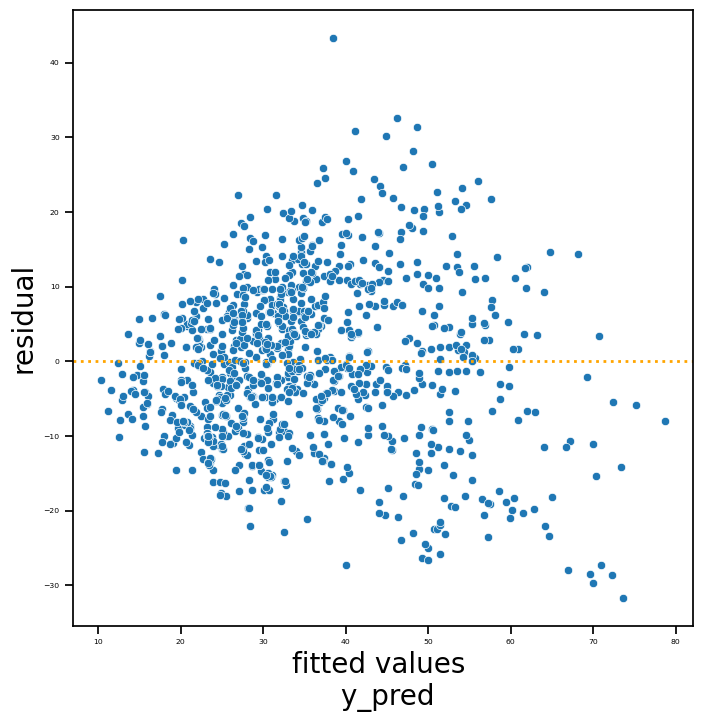

In [27]:

plt.figure(figsize=(8,8))
sns.set_context("notebook",font_scale=0.5)
ax = sns.scatterplot(data=df_ols,x="y_pred",y="residual")
ax.axhline(y=0,linewidth=2,color="orange",ls=":")
plt.xlabel("fitted values \n y_pred",fontsize = 20)
plt.ylabel("residual",fontsize=20)

The plot indicates heteroscedasticity because the residuals are more dispersed for larger fitted values.

For this reason, the OLS assumptions are partially viaolated. Therefore , we cannot use the OLS model.

NON-OLS models.

We take 4 different models:
- KNN
- Decision tree
- Random forest
- Ada boost
- XGBoost

In [28]:
X = df.drop("csMPa",axis=1)
y = df["csMPa"]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate, cross_val_score,GridSearchCV,RandomizedSearchCV

knn = KNeighborsRegressor(n_neighbors=3)
rf = RandomForestRegressor(random_state=42)
dt = DecisionTreeRegressor(random_state=42)
xgb = XGBRegressor()
ada = AdaBoostRegressor(random_state=42)


models = [
    ("KNN", knn),
    ("Decision tree",dt),
    ("Random Forest", rf),
    ("AdaBoost",ada),
    ("XGBoost", xgb)
]

In [66]:
for name,model in models:
    pipe = Pipeline([
        (("scaler"),RobustScaler()),
        (("model"),model)
    ])

    model_cv = cross_val_score(
        estimator = pipe,
        X = X_train,
        y= y_train,
        cv = 10,
        scoring="neg_mean_absolute_error"
    )

    print(f"model {name} mean : ", round(-model_cv.mean(),2))

model KNN mean :  6.03
model Decision tree mean :  4.76
model Random Forest mean :  3.73
model AdaBoost mean :  6.19
model XGBoost mean :  3.26


since XGBoost produces the best score, we will proceed to hyperparameter tuning with XGBoost algorithm

#### hyperparameter tuning

In [55]:
# Define the hyperparameter grid
param_grid = {
    'model__n_estimators': [100, 200, 500],           # Number of boosting rounds
    'model__learning_rate': [0.01, 0.05, 0.1, 0.3],   # Learning rate (eta)
    'model__max_depth': [3, 5, 7, 10],                # Maximum depth of a tree
    'model__min_child_weight': [1, 3, 5],             # Minimum sum of weights of all child nodes
    'model__subsample': [0.6, 0.8, 1.0],              # Fraction of observations to sample
    'model__colsample_bytree': [0.6, 0.8, 1.0],       # Fraction of features to sample for each tree
    'model__gamma': [0, 0.1, 0.3],                    # Minimum loss reduction required to split
    'model__reg_alpha': [0, 0.01, 0.1, 1],            # L1 regularization term
    'model__reg_lambda': [1, 1.5, 2],                 # L2 regularization term
}

estimator = Pipeline([
        (("scaler"),RobustScaler()),
        (("model"),xgb)
    ])

# Define the GridSearchCV
random_search = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=param_grid,
    scoring='neg_mean_absolute_error',    # Adjust to preferred metric
    cv=5,                                     # Number of cross-validation folds
    n_jobs=-1,                                 # Use all CPU cores
    verbose=0,
    n_iter=100,
    random_state=42                                  # Display progress
)

# Fit the model to your data (e.g., X_train, y_train)
random_search.fit(X_train, y_train)

# To view the best parameters after fitting:
print("Best Parameters:", random_search.best_params_)
print("Best score:",random_search.best_score_)

Best Parameters: {'model__subsample': 0.6, 'model__reg_lambda': 1.5, 'model__reg_alpha': 0, 'model__n_estimators': 500, 'model__min_child_weight': 5, 'model__max_depth': 5, 'model__learning_rate': 0.1, 'model__gamma': 0.3, 'model__colsample_bytree': 0.8}
Best score: -3.0704268620476216


In [60]:
param = {'model__subsample': 0.6, 
         'model__reg_lambda': 1.5, 
         'model__reg_alpha': 0, 
         'model__n_estimators': 500, 
         'model__min_child_weight': 5, 
         'model__max_depth': 5, 
         'model__learning_rate': 0.1, 
         'model__gamma': 0.3, 
         'model__colsample_bytree': 0.8}

xgb=XGBRegressor(**param)

pipe_xgb = pipe = Pipeline([
        (("scaler"),RobustScaler()),
        (("model"),xgb)
    ])
pipe_xgb.fit(X_train,y_train)
y_pred = pipe_xgb.predict(X_test)

# Calculating Adjusted R-squared
r2 = pipe_xgb.score(X_test, y_test)
# Number of observations is the shape along axis 0
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Adjusted R-squared formula
pipe_xgb_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
pipe_xgb_MAE = metrics.mean_absolute_error(y_test, y_pred)
pipe_xgb_mape = metrics.mean_absolute_percentage_error(y_test,y_pred)
print('MAE:', pipe_xgb_MAE)
print("MAPE: ",pipe_xgb_mape)
print('Adjusted R2:', round(pipe_xgb_adjusted_r2, 4) )

MAE: 2.756894815312096
MAPE:  0.09444664007055296
Adjusted R2: 0.9288


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:30:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "model__colsample_bytree", "model__gamma", "model__learning_rate", "model__max_depth", "model__min_child_weight", "model__n_estimators", "model__reg_alpha", "model__reg_lambda", "model__subsample" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost with hyperparameter tuning managed to get MAE of 2.75 , which is better than the default tuning (3.07). Therefore the final model will be XGBoost with hyperparameter tuning.

<Axes: xlabel='csMPa'>

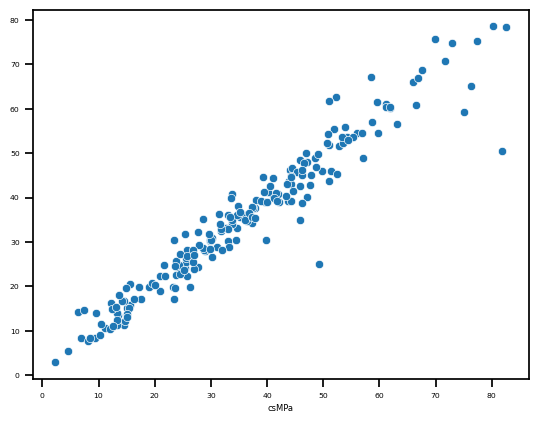

In [61]:
#visualising the prediction points compared with actual in data test
sns.scatterplot(x=y_test,y=y_pred)

Feature importances

In [67]:
imp = pipe_xgb[-1].feature_importances_
imp

array([0.20840064, 0.14729628, 0.0485737 , 0.10134066, 0.17886557,
       0.0247651 , 0.06299821, 0.22775985], dtype=float32)

In [72]:
feature_imp = pd.DataFrame({
    'Importance':imp,
    'Features': X.columns
}).sort_values(by='Importance',ascending=False)
feature_imp

,Importance,Features
7,0.227760,age
0,0.208401,cement
4,0.178866,superplasticizer
1,0.147296,slag
3,0.101341,water
6,0.062998,fineaggregate
2,0.048574,flyash
5,0.024765,coarseaggregate


/var/folders/dz/1xdxcyhn3d1740p67b4ktyzr0000gn/T/ipykernel_4098/3837033907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_imp,x='Importance',y='Features',orient='h',palette='Spectral')


<Axes: xlabel='Importance', ylabel='Features'>

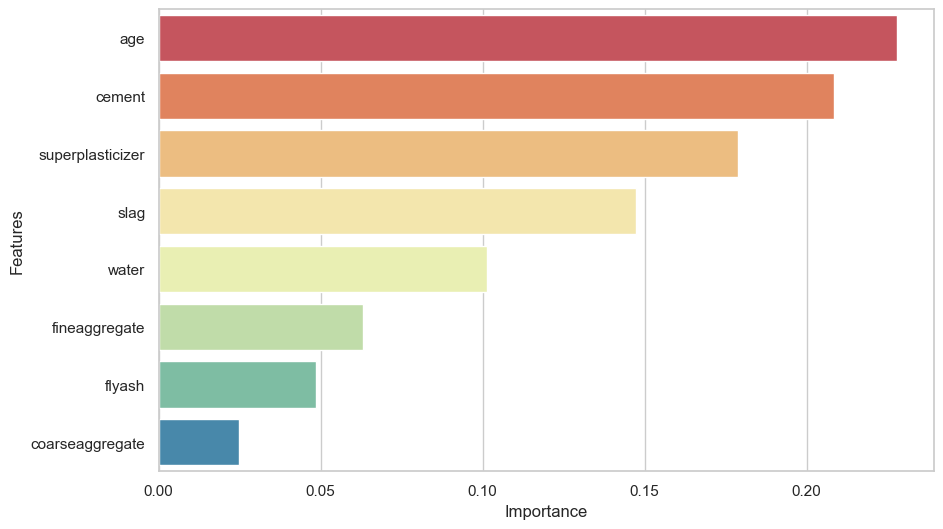

In [73]:
plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')
sns.barplot(data=feature_imp,x='Importance',y='Features',orient='h',palette='Spectral')

In [80]:
import shap

# Convert the model to a SHAP explainer
explainer_shap = shap.TreeExplainer(pipe_xgb[1])

X_test_transformed = pd.DataFrame(RobustScaler().fit_transform(X_test))
X_test_transformed.columns = X.columns

# Calculate SHAP values for the test set
shap_values = explainer_shap(X_test_transformed)

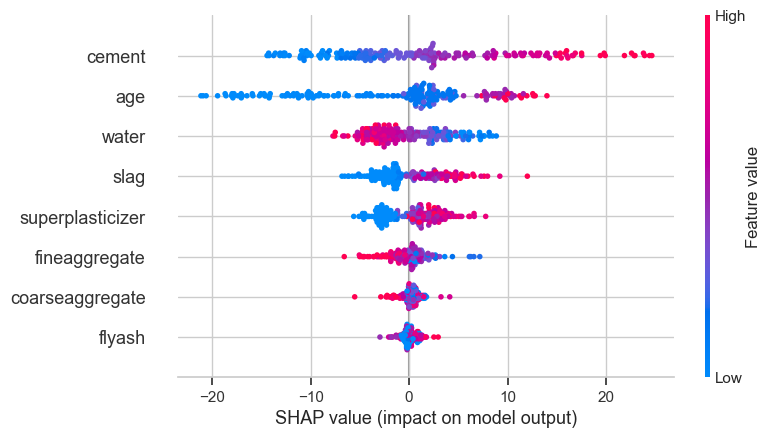

In [81]:
shap.plots.beeswarm(shap_values, max_display=10)

# predicting on new dataset

In [94]:
new_data_min = pd.DataFrame({
    'cement' : 200,
    'slag' : 0,
    'flyash' : 0,
    'water' : 162,
    'superplasticizer' : 2.5,
    'coarseaggregate' : 1040,
    'fineaggregate' : 676,
    'age'  : 20
}, index=[0])

new_data_min

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,200,0,0,162,2.5,1040,676,20


In [95]:
print("predicted csMPa:",round(pipe_xgb.predict(new_data_min)[0]))

predicted csMPa: 25


In [102]:
new_data_max = pd.DataFrame({
    'cement' : 1000,
    'slag' : 0,
    'flyash' : 0,
    'water' : 162,
    'superplasticizer' : 2.5,
    'coarseaggregate' : 1040,
    'fineaggregate' : 676,
    'age'  : 70
}, index=[0])

new_data_max

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,1000,0,0,162,2.5,1040,676,70


In [103]:
print("predicted csMPa:",round(pipe_xgb.predict(new_data_max)[0]))

predicted csMPa: 79
